# Common code

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import numpy as np
from tqdm.notebook import trange, tqdm
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from sklearn.metrics import accuracy_score

import time

from idlmam import weight_reset, moveTo, train_network, train_simple_network

loss_func = nn.CrossEntropyLoss()
score_funcs={'Accuracy': accuracy_score}
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
eta_0 = 0.001

def train_network_simplest(model, train_loader, test_loader):
    return train_network(model, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)

# Excercise 1
Try replacing the LeakyReLU with the `nn.PReLU` activation function in the various CNNs we have trained. Does it perform better or worse?

In [2]:
train_data = torchvision.datasets.FashionMNIST("./data", train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.FashionMNIST("./data", train=True, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

W, H = 28, 28
D = 28*28
n = 256
C = 1
n_filters = 32
classes = 10
leak_rate = 0.1

EPOCHS=8

In [3]:
def cnnLayer(in_filters, out_filters=None, kernel_size=3, actication_func=lambda: nn.LeakyReLU(leak_rate)):
    """
    in_filters: how many channels are coming into the layer
    out_filters: how many channels this layer should learn / output, or `None` if we want to have the same number of channels as the input.
    kernel_size: how large the kernel should be
    """
    if out_filters is None:
        out_filters = in_filters #This is a common pattern, so lets automate it as a default if not asked
    padding=kernel_size//2 #padding to stay the same size
    return nn.Sequential( # Combine the layer and activation into a single unit
        nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding),
        actication_func()
    )

def create_model(actication_func):
    return nn.Sequential(
        cnnLayer(C, n_filters, actication_func=actication_func), cnnLayer(n_filters, actication_func=actication_func),
        cnnLayer(n_filters, actication_func=actication_func),
        nn.MaxPool2d((2, 2)),
        cnnLayer(n_filters, 2 * n_filters, actication_func=actication_func),
        cnnLayer(2 * n_filters, actication_func=actication_func),
        cnnLayer(2 * n_filters, actication_func=actication_func),
        nn.MaxPool2d((2, 2)),
        cnnLayer(2 * n_filters, 4 * n_filters, actication_func=actication_func),
        cnnLayer(4 * n_filters, actication_func=actication_func),
        nn.Flatten(),
        nn.Linear(D * n_filters // 4, classes),
    )

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

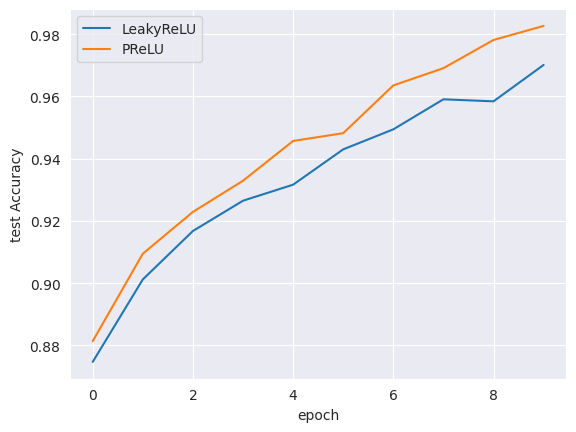

In [16]:
cnn_leakyrelu_model = create_model(lambda: nn.LeakyReLU(leak_rate))
cnn_prelu_model = create_model(nn.PReLU)

e1_results_leakyrelu = train_network(cnn_leakyrelu_model, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del cnn_leakyrelu_model
e1_results_prelu = train_network(cnn_prelu_model, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del cnn_prelu_model

sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_leakyrelu, label='LeakyReLU')
sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_prelu, label='PReLU')

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

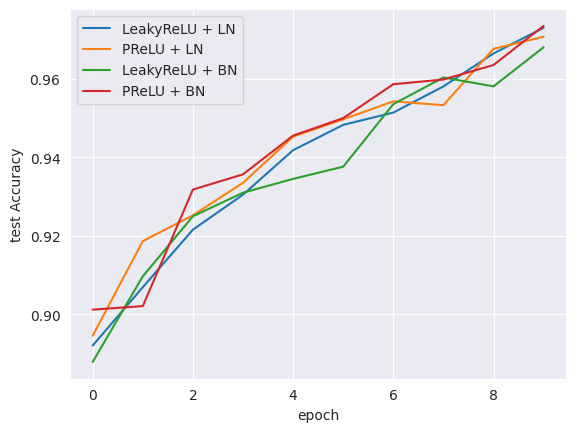

In [3]:
def cnnLayer_bn(in_filters, out_filters=None, actication_func=lambda: nn.LeakyReLU(leak_rate), kernel_size=3):
    if out_filters is None:
        out_filters = in_filters #This is a common pattern, so lets automate it as a default if not asked
    padding=kernel_size//2 #padding to stay the same size
    return nn.Sequential( # Combine the layer and activation into a single unit
        nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding),
        nn.BatchNorm2d(out_filters), #The only change, adding BatchNorm2d after our convolution!
        actication_func()
    )

def create_model_bn(activcation_func):
    return nn.Sequential(
        cnnLayer_bn(C, n_filters, activcation_func=activcation_func),
        cnnLayer_bn(n_filters, activcation_func=activcation_func),
        cnnLayer_bn(n_filters, activcation_func=activcation_func),
        nn.MaxPool2d((2,2)),
        cnnLayer_bn(n_filters, 2*n_filters, activcation_func=activcation_func),
        cnnLayer_bn(2*n_filters, activcation_func=activcation_func),
        cnnLayer_bn(2*n_filters, activcation_func=activcation_func),
        nn.MaxPool2d((2,2)),
        cnnLayer_bn(2*n_filters, 4*n_filters, activcation_func=activcation_func),
        cnnLayer(4*n_filters, activcation_func=activcation_func),
        nn.Flatten(),
        nn.Linear(D*n_filters//4, classes),
    )

def cnnLayer_ln(in_filters, out_filters=None, activcation_func=lambda: nn.LeakyReLU(leak_rate), pool_factor=0, kernel_size=3):
    if out_filters is None:
        out_filters = in_filters #This is a common pattern, so lets automate it as a default if not asked
    padding=kernel_size//2 #padding to stay the same size
    return nn.Sequential( # Combine the layer and activation into a single unit
        nn.Conv2d(in_filters, out_filters, kernel_size, padding=padding),
        nn.LayerNorm([out_filters, W//(2**pool_factor), H//(2**pool_factor)]), #The only change, adding BatchNorm2d after our convolution!
        activcation_func()
    )

def create_model_ln(activcation_func):
    return nn.Sequential(
        cnnLayer_ln(C, n_filters, activcation_func=activcation_func),
        cnnLayer_ln(n_filters, activcation_func=activcation_func),
        cnnLayer_ln(n_filters, activcation_func=activcation_func),
        nn.MaxPool2d((2,2)), #we've done one round of pooling, so , pool_factor=1 now
        cnnLayer_ln(n_filters, 2 * n_filters, pool_factor=1, activcation_func=activcation_func),
        cnnLayer_ln(2 * n_filters, pool_factor=1, activcation_func=activcation_func),
        cnnLayer_ln(2 * n_filters, pool_factor=1, activcation_func=activcation_func),
        nn.MaxPool2d((2,2)), #now we've done two rounds of pooling, so pool_factor=2
        cnnLayer_ln(2 * n_filters, 4 * n_filters, pool_factor=2, activcation_func=activcation_func),
        cnnLayer_ln(4 * n_filters, pool_factor=2, activcation_func=activcation_func),
        nn.Flatten(),
        nn.Linear(D*n_filters//4, classes),
    )

cnn_leakyrelu_bn = create_model_ln(lambda: nn.LeakyReLU(leak_rate))
cnn_prelu_bn = create_model_ln(nn.PReLU)

cnn_leakyrelu_ln = create_model_ln(lambda: nn.LeakyReLU(leak_rate))
cnn_prelu_ln = create_model_ln(nn.PReLU)

e1_results_leakyrelu_ln = train_network(cnn_leakyrelu_ln, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del cnn_leakyrelu_ln
e1_results_prelu_ln = train_network(cnn_prelu_ln, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del cnn_prelu_ln

e1_results_leakyrelu_bn = train_network(cnn_leakyrelu_bn, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del cnn_leakyrelu_bn
e1_results_prelu_bn = train_network(cnn_prelu_bn, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del cnn_prelu_bn

sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_leakyrelu_ln, label='LeakyReLU + LN')
sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_prelu_ln, label='PReLU + LN')
sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_leakyrelu_bn, label='LeakyReLU + BN')
sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_prelu_bn, label='PReLU + BN')

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

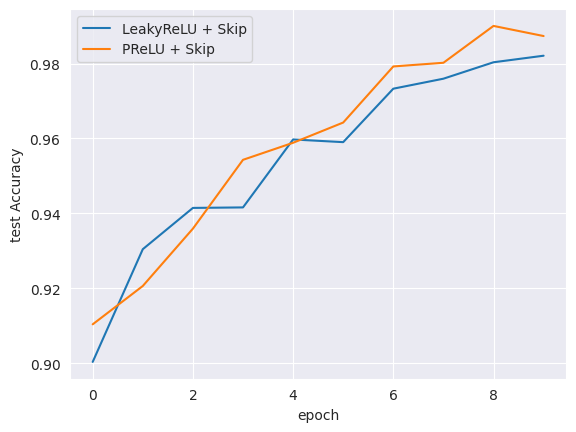

In [7]:
class SkipConv2d(nn.Module):
    def __init__(self, n_layers, in_channels, out_channels, kernel_size=3, activation_func=lambda: nn.LeakyReLU(leak_rate)):

        super().__init__()

        l = n_layers-1
        f = (kernel_size, kernel_size)
        pad = (kernel_size-1)//2

        self.layers = nn.ModuleList([nn.Conv2d(in_channels*l, out_channels, kernel_size=f, padding=pad) if i == l else nn.Conv2d(in_channels, in_channels, kernel_size=f, padding=pad) for i in range(n_layers)])
        self.bns = nn.ModuleList([nn.BatchNorm2d(out_channels) if i == l else nn.BatchNorm2d(in_channels) for i in range(n_layers)])
        self.activation = activation_func()

    def forward(self, x):
        activations = []

        for layer, bn in zip(self.layers[:-1], self.bns[:-1]):
            x = self.activation(bn(layer(x)))
            activations.append( x )

        x = torch.cat(activations, dim=1)

        return self.activation(self.bns[-1](self.layers[-1](x)))

def create_skip_model(activation_func):
    return nn.Sequential(
        nn.Conv2d(C, n_filters, (3,3), padding=1),
        SkipConv2d(3, n_filters, 2*n_filters, activation_func=activation_func),
        nn.MaxPool2d((2,2)),
        activation_func(),
        SkipConv2d(3, 2*n_filters, 4*n_filters, activation_func=activation_func),
        nn.MaxPool2d((2,2)),
        SkipConv2d(2, 4*n_filters, 4*n_filters, activation_func=activation_func),
        nn.Flatten(),
        nn.Linear(D*n_filters//4, classes)
    )

skip_model_leakyrelu=create_skip_model(lambda: nn.LeakyReLU(leak_rate))
skip_model_prelu=create_skip_model(nn.PReLU)

e1_results_leakyrelu_skip = train_network(skip_model_leakyrelu, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del skip_model_leakyrelu
e1_results_prelu_skip = train_network(skip_model_prelu, loss_func, train_loader, test_loader=test_loader, epochs=EPOCHS, score_funcs=score_funcs, device=device)
del skip_model_prelu

sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_leakyrelu_skip, label='LeakyReLU + Skip')
sns.lineplot(x='epoch', y='test Accuracy', data=e1_results_prelu_skip, label='PReLU + Skip')

Conclusion: PReLU adds model performance and training time in all the cases

# Excercise 2
Write a `for` loop to train CNN models with 1 to 20 sets of hidden layers, once with BN layers and one without. How does BN impact the ability to learn deeper models?

In [ ]:
def e2_create_bn_model(hidden_layers):
    return nn.Sequential(
        nn.Flatten(),
        nn.Linear(D, n), nn.BatchNorm1d(n), nn.LeakyReLU(leak_rate),
        *[nn.Sequential(nn.Linear(n, n), nn.BatchNorm1d(n), nn.LeakyReLU(leak_rate)) for _ in range(hidden_layers)],
        nn.Linear(n, classes),
    )

def e2_create_model(hidden_layers):
    return nn.Sequential(
        nn.Flatten(),
        nn.Linear(D, n), nn.LeakyReLU(leak_rate),
        *[nn.Sequential(nn.Linear(n, n), nn.BatchNorm1d(n), nn.LeakyReLU(leak_rate)) for _ in range(hidden_layers)],
        nn.Linear(n, classes),
    )

e2_results = []
for i in trange(1, 21, desc="Network size"):
   ith_bn_model = e2_create_bn_model(i)
   ith_results_bn = train_network_simplest(ith_bn_model, train_loader, test_loader)
   del ith_bn_model

   ith_model_plain = e2_create_model(i)
   ith_results_plain = train_network_simplest(ith_model_plain, train_loader, test_loader)
   del ith_model_plain

   e2_results.append({"bn": ith_results_bn,
                      "plain": ith_results_plain})

<Axes: xlabel='epoch', ylabel='test Accuracy'>

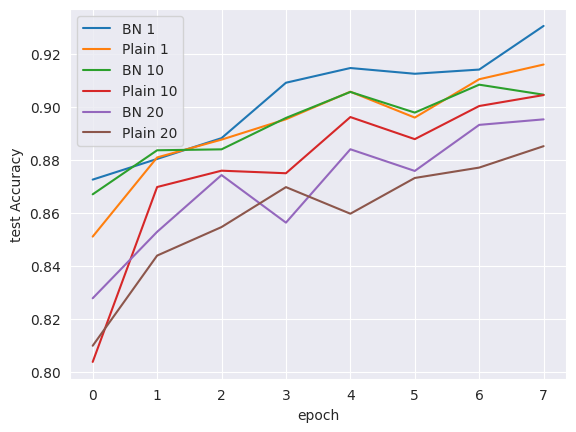

In [29]:
sns.lineplot(x='epoch', y='test Accuracy', data=e2_results[0]['bn'], label='BN 1')
sns.lineplot(x='epoch', y='test Accuracy', data=e2_results[0]['plain'], label='Plain 1')
sns.lineplot(x='epoch', y='test Accuracy', data=e2_results[9]['bn'], label='BN 10')
sns.lineplot(x='epoch', y='test Accuracy', data=e2_results[9]['plain'], label='Plain 10')
sns.lineplot(x='epoch', y='test Accuracy', data=e2_results[19]['bn'], label='BN 20')
sns.lineplot(x='epoch', y='test Accuracy', data=e2_results[19]['plain'], label='Plain 20')

<Axes: xlabel='epoch', ylabel='total time'>

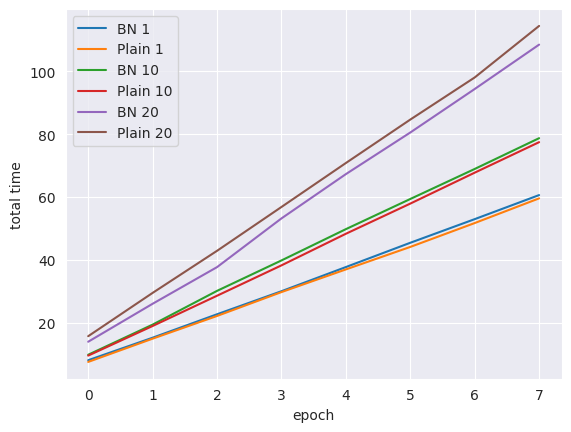

In [30]:
sns.lineplot(x='epoch', y='total time', data=e2_results[0]['bn'], label='BN 1')
sns.lineplot(x='epoch', y='total time', data=e2_results[0]['plain'], label='Plain 1')
sns.lineplot(x='epoch', y='total time', data=e2_results[9]['bn'], label='BN 10')
sns.lineplot(x='epoch', y='total time', data=e2_results[9]['plain'], label='Plain 10')
sns.lineplot(x='epoch', y='total time', data=e2_results[19]['bn'], label='BN 20')
sns.lineplot(x='epoch', y='total time', data=e2_results[19]['plain'], label='Plain 20')

Conclusions:
1. I didn't have to wait for all 20 iterations. It was enough to train models with 1, 10 and 20 hidden layers
2. It's absolutely clear that Batch Normalization layer improves model performance with an insignificant increment of training duration

# Excercise 3
MATH: We used algebra to show that a linear layer followed by BN is equivalent to one linear layer. Try doing the same kind of math to show that BN followed by a linear layer also is equivalent to one different linear layer.

Linear layer is $xW + b$ and the input $x$ of the layer is a normalized layer $\frac{x^T - \mu}{\sigma}\gamma + \beta$
Combined they look like $\left(\frac{x^T - \mu}{\sigma}\gamma + \beta\right)W + b $
Now let's use some algebra to transform this statement
1.  $\frac{x^T\gamma\cdot W - \mu\cdot\gamma\cdot W}{\sigma} + \beta\cdot W + b$
2.  $x^T\left(\frac{\gamma\cdot W}{\sigma}\right) - \frac{\mu\cdot\gamma\cdot W}{\sigma} + \beta\cdot W + b$
3.  $x^T\underbrace{\left(\frac{\gamma\cdot W}{\sigma}\right)}_{\tilde{W}} - \underbrace{\frac{\mu\cdot\gamma\cdot W}{\sigma} + \beta\cdot W + b}_{\tilde{b}} = x^T\tilde{W} + \tilde{b}$
Done!

# Excercise 4
Re-implement the `ResidualBlockE` for fully connected layers instead of convolutional layers. Does making the fully connected model use residual connections still improve performance?

In [4]:
e4_fc_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n), nn.LayerNorm([n]), nn.LeakyReLU(leak_rate),
    *[nn.Sequential(nn.Linear(n, n), nn.LayerNorm([n]), nn.LeakyReLU(leak_rate)) for _ in range(2)],
    nn.Linear(n, classes)
)

e4_results_fc = train_network_simplest(e4_fc_model, train_loader, test_loader)
del e4_fc_model

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/469 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

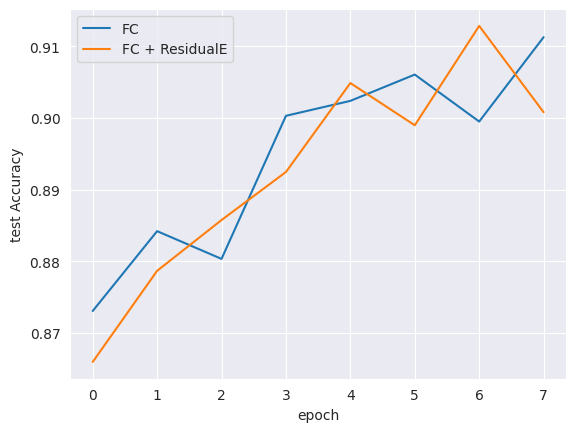

In [5]:
class LinearResidualBlockE(nn.Module):
    def __init__(self, neurons, leak_rate=0.1):
        super().__init__()
        self.F = nn.Sequential(
            nn.Linear(neurons, neurons),
            nn.LayerNorm([neurons]),
            nn.LeakyReLU(leak_rate),
            nn.Linear(neurons, neurons),
            nn.LayerNorm([neurons]),
            nn.LeakyReLU(leak_rate),
        )
    def forward(self, x):
        return x + self.F(x)

e4_residual_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n), nn.LayerNorm([n]), nn.LeakyReLU(leak_rate),
    LinearResidualBlockE(n, leak_rate),
    nn.LeakyReLU(leak_rate),
    LinearResidualBlockE(n, leak_rate),
    nn.LeakyReLU(leak_rate),
    nn.Linear(n, classes)
)

e4_results_residual = train_network_simplest(e4_residual_model, train_loader, test_loader)
del e4_residual_model

sns.lineplot(x='epoch', y='test Accuracy', data=e4_results_fc, label='FC')
sns.lineplot(x='epoch', y='test Accuracy', data=e4_results_residual, label='FC + ResidualE')

Conclusion: It looks like ResidualE blocks do not add anything but training time to FC models

# Excercise 5
Write a for loop to train a residual model with progressively more combinations of `ResidualBlockE` layers. Do the residual blocks allow you to train even deeper models?

In [ ]:
class ResidualBlockE(nn.Module):
    def __init__(self, channels, kernel_size=3, leak_rate=0.1):
        """
        channels: how many channels are in the input/output to this layer
        kernel_size: how large of a filter should we use
        leak_rate: parameter for the LeakyReLU activation function
        """
        super().__init__()
        pad = (kernel_size-1)//2
        self.F = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size, padding=pad),
            nn.BatchNorm2d(channels),
            nn.LeakyReLU(leak_rate),
            nn.Conv2d(channels, channels, kernel_size, padding=pad),
            nn.BatchNorm2d(channels),
            nn.LeakyReLU(leak_rate),
        )
    def forward(self, x):
        return x + self.F(x)

def create_cnn_res_model(n_residual_blocks):
    return nn.Sequential(
        nn.Conv2d(C, n_filters, 3, padding=3//2),
        *[nn.Sequential(ResidualBlockE(n_filters), nn.LeakyReLU(leak_rate)) for _ in range(n_residual_blocks)],
        nn.Flatten(),
        nn.Linear(D*n_filters, classes),
    )

EPOCHS = 20

e5_results=[]
for i in [1,3,5,8,13]:
    e5_model = create_cnn_res_model(i)
    e5_train_result = train_network_simplest(e5_model, train_loader, test_loader)
    del e5_model
    e5_results.append({"i" : i, "train_result" : e5_train_result})

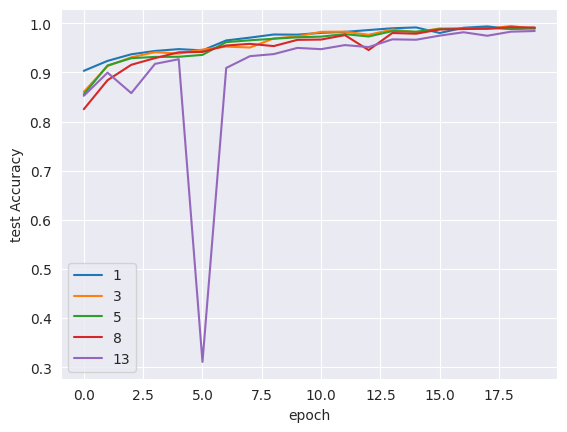

In [17]:
for r in e5_results:
    data = r['train_result']
    sns.lineplot(x='epoch', y='test Accuracy', data=data, label=r["i"])

Conclusion: Looks like adding just more residual blocks, same as in prev. exercise, only increases training time.

# Excercise 6
Try creating a bidirectional LSTM layer. Do you get better or worse results?

## Common code for variable-length data

In [4]:
zip_file_url = "https://download.pytorch.org/tutorial/data.zip"

import requests, zipfile, io
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#Zip file is organized as data/names/[LANG].txt , where [LANG] is a specific language

namge_language_data = {}

#We will use some code to remove UNICODE tokens to make life easy for us processing wise
#e.g., convert something like "Ślusàrski" to Slusarski
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
alphabet = {}
for i in range(n_letters):
    alphabet[all_letters[i]] = i

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

#Loop through every language, open the zip file entry, and read all the lines from the text file.
for zip_path in z.namelist():
    if "data/names/" in zip_path and zip_path.endswith(".txt"):
        lang = zip_path[len("data/names/"):-len(".txt")]
        with z.open(zip_path) as myfile:
            lang_names = [unicodeToAscii(line).lower() for line in str(myfile.read(), encoding='utf-8').strip().split("\n")]
            namge_language_data[lang] = lang_names

In [5]:
from idlmam import LanguageNameDataset, pad_and_pack

dataset = LanguageNameDataset(namge_language_data, alphabet)#Reusing our code from chapter 4

train_lang_data, test_lang_data = torch.utils.data.random_split(dataset, (len(dataset)-300, 300))
train_lang_loader = DataLoader(train_lang_data, batch_size=32, shuffle=True, collate_fn=pad_and_pack)
test_lang_loader = DataLoader(test_lang_data, batch_size=32, shuffle=False, collate_fn=pad_and_pack)

## Excercise code

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

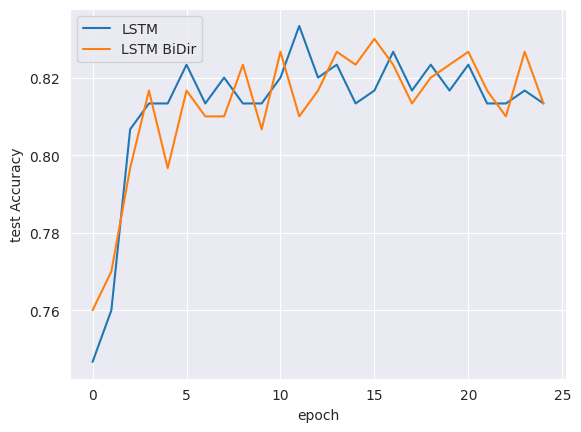

In [31]:
from torch.optim import AdamW
from idlmam import EmbeddingPackable, LastTimeStep

EPOCHS=25

def train_lstm(bidirectional=None):
    model = nn.Sequential(
      EmbeddingPackable(nn.Embedding(len(all_letters), 64)), #(B, T) -> (B, T, D)
      #nn.RNN became nn.LSTM, and now we are upgraded to LSTMs w/ peephole connections
      nn.LSTM(64, n, num_layers=3, batch_first=True, bidirectional=bidirectional), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
      LastTimeStep(rnn_layers=3, bidirectional=bidirectional), #We need to take the RNN output and reduce it to one item, (B, D)
      nn.Linear(2*n if bidirectional else n, len(namge_language_data)), #(B, D) -> (B, classes)
    )
    for p in model.parameters():
        p.register_hook(lambda grad: torch.clamp(grad, -5, 5))
    optimizer = AdamW(model.parameters(), lr=0.001)
    lr_schedule = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.93)
    lstm_results = train_network(model, loss_func, train_lang_loader, test_loader=test_lang_loader,
                                 score_funcs={'Accuracy': accuracy_score}, device=device, epochs=EPOCHS,
                                 optimizer=optimizer, lr_schedule=lr_schedule)
    del model
    return lstm_results

e6_lstm_bidir_result = train_lstm(bidirectional=True)
e6_lstm_result = train_lstm(bidirectional=False)

sns.lineplot(x='epoch', y='test Accuracy', data=e6_lstm_result, label='LSTM')
sns.lineplot(x='epoch', y='test Accuracy', data=e6_lstm_bidir_result, label='LSTM BiDir')

<Axes: xlabel='total time', ylabel='test Accuracy'>

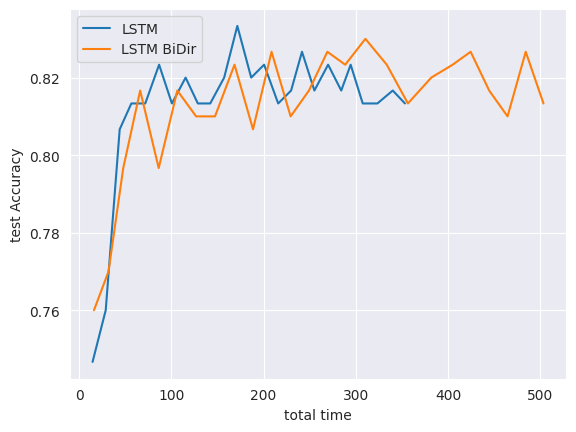

In [32]:
sns.lineplot(x='total time', y='test Accuracy', data=e6_lstm_result, label='LSTM')
sns.lineplot(x='total time', y='test Accuracy', data=e6_lstm_bidir_result, label='LSTM BiDir')

Conclusion: Bidirectional LSTM significantly increases training time but not trained model's performance.

# Excercise 7
Try training various LSTM and GRU networks with varying numbers of layers and neurons, and compare them in terms of the time to reach a desired accuracy level. Do you see any relative pros or cons of each?

In [21]:
from torch.optim import AdamW
from idlmam import EmbeddingPackable, LastTimeStep

EPOCHS=12

def e7_train(core_layer, lr, num_layers=3, num_neurons=n):
    model = nn.Sequential(
      EmbeddingPackable(nn.Embedding(len(all_letters), 64)), #(B, T) -> (B, T, D)
      core_layer(64, num_neurons, num_layers=num_layers, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
      LastTimeStep(rnn_layers=num_layers), #We need to take the RNN output and reduce it to one item, (B, D)
      nn.Linear(num_neurons, len(namge_language_data)), #(B, D) -> (B, classes)
    )
    for p in model.parameters():
        p.register_hook(lambda grad: torch.clamp(grad, -5, 5))
    optimizer = AdamW(model.parameters(), lr=lr)
    lr_schedule = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.95)
    lstm_results = train_network(model, loss_func, train_lang_loader, test_loader=test_lang_loader,
                                 score_funcs={'Accuracy': accuracy_score}, device=device, epochs=EPOCHS,
                                 optimizer=optimizer, lr_schedule=lr_schedule)
    del model
    return lstm_results

e7_lstm_2n = e7_train(nn.LSTM, 0.0005, num_layers=2, num_neurons=n)
e7_lstm_3n = e7_train(nn.LSTM, 0.0005, num_layers=3, num_neurons=n)
e7_lstm_4n = e7_train(nn.LSTM, 0.0005, num_layers=4, num_neurons=n)

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

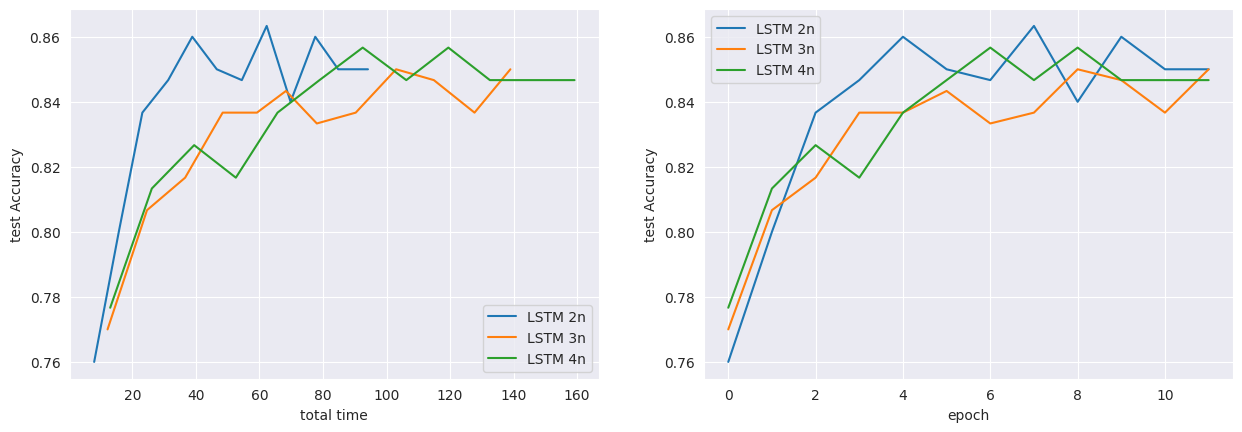

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
sns.lineplot(x='total time', y='test Accuracy', data=e7_lstm_2n, label='LSTM 2n', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_lstm_3n, label='LSTM 3n', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_lstm_4n, label='LSTM 4n', ax=axs[0])

sns.lineplot(x='epoch', y='test Accuracy', data=e7_lstm_2n, label='LSTM 2n', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_lstm_3n, label='LSTM 3n', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_lstm_4n, label='LSTM 4n', ax=axs[1])

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

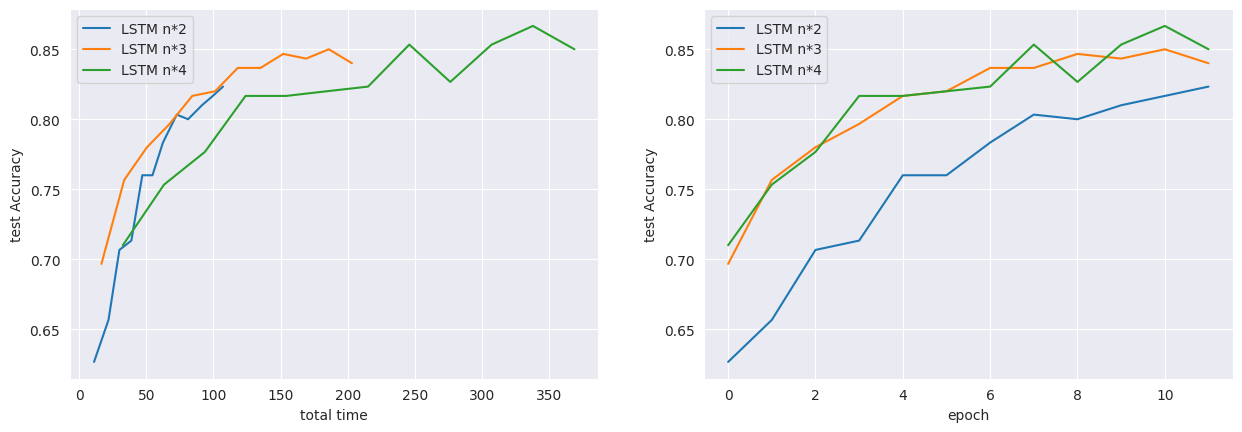

In [23]:
e7_lstm_2_n2 = e7_train(nn.LSTM, 0.0001, num_layers=3, num_neurons=n//2)
e7_lstm_2_n3 = e7_train(nn.LSTM, 0.0001, num_layers=3, num_neurons=n*2)
e7_lstm_2_n4 = e7_train(nn.LSTM, 0.0001, num_layers=3, num_neurons=n*3)

fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
sns.lineplot(x='total time', y='test Accuracy', data=e7_lstm_2_n2, label='LSTM n*2', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_lstm_2_n3, label='LSTM n*3', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_lstm_2_n4, label='LSTM n*4', ax=axs[0])

sns.lineplot(x='epoch', y='test Accuracy', data=e7_lstm_2_n2, label='LSTM n*2', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_lstm_2_n3, label='LSTM n*3', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_lstm_2_n4, label='LSTM n*4', ax=axs[1])

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

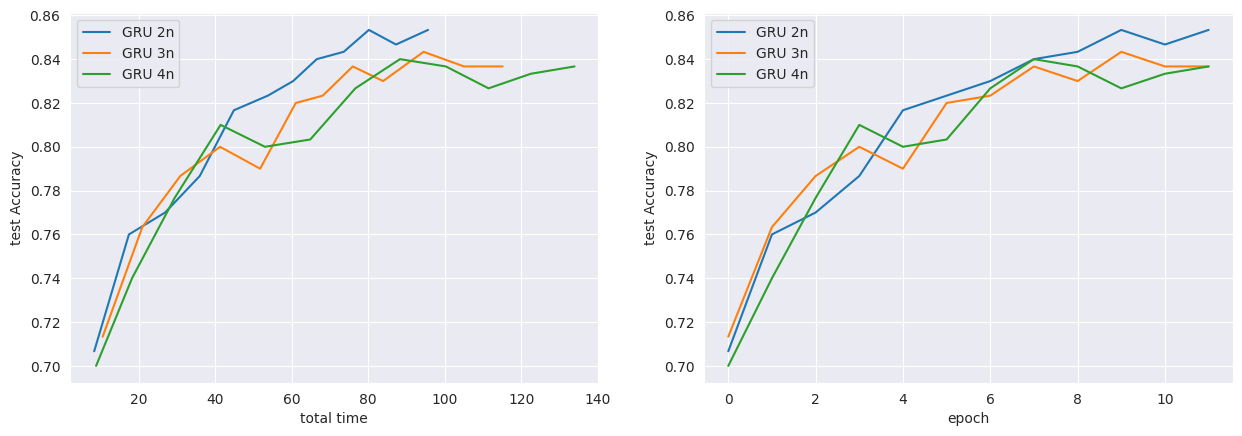

In [24]:
e7_gru_2n = e7_train(nn.GRU, 0.0001, num_layers=2, num_neurons=n)
e7_gru_3n = e7_train(nn.GRU, 0.0001, num_layers=3, num_neurons=n)
e7_gru_4n = e7_train(nn.GRU, 0.0001, num_layers=4, num_neurons=n)

fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
sns.lineplot(x='total time', y='test Accuracy', data=e7_gru_2n, label='GRU 2n', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_gru_3n, label='GRU 3n', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_gru_4n, label='GRU 4n', ax=axs[0])

sns.lineplot(x='epoch', y='test Accuracy', data=e7_gru_2n, label='GRU 2n', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_gru_3n, label='GRU 3n', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_gru_4n, label='GRU 4n', ax=axs[1])

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/12 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/618 [00:00<?, ?it/s]

Testing:   0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

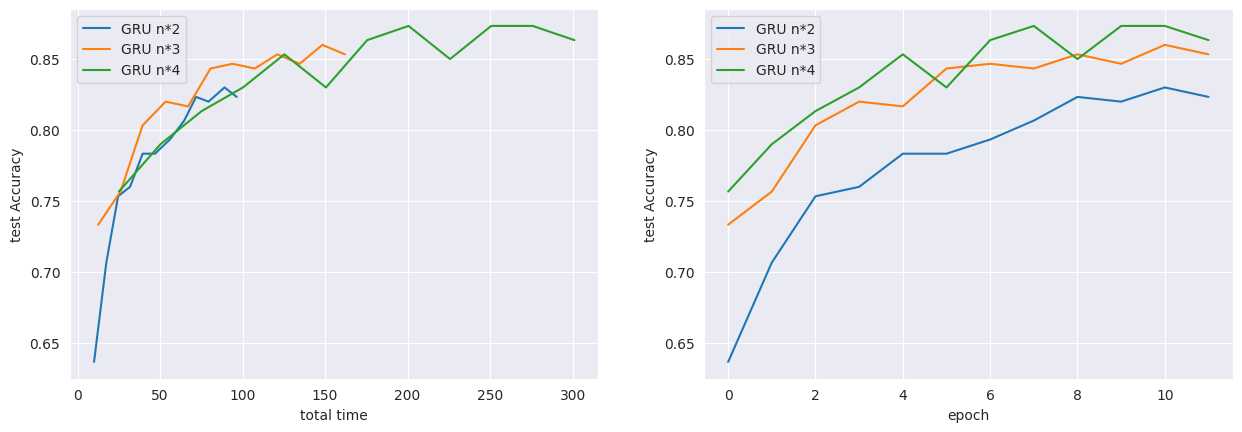

In [25]:
e7_gru_n_n2 = e7_train(nn.GRU, 0.0001, num_layers=3, num_neurons=n//2)
e7_gru_n_n3 = e7_train(nn.GRU, 0.0001, num_layers=3, num_neurons=n*2)
e7_gru_n_n4 = e7_train(nn.GRU, 0.0001, num_layers=3, num_neurons=n*3)

fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
sns.lineplot(x='total time', y='test Accuracy', data=e7_gru_n_n2, label='GRU n//2', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_gru_n_n3, label='GRU n*3', ax=axs[0])
sns.lineplot(x='total time', y='test Accuracy', data=e7_gru_n_n4, label='GRU n*4', ax=axs[0])

sns.lineplot(x='epoch', y='test Accuracy', data=e7_gru_n_n2, label='GRU n2', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_gru_n_n3, label='GRU n*3', ax=axs[1])
sns.lineplot(x='epoch', y='test Accuracy', data=e7_gru_n_n4, label='GRU n*4', ax=axs[1])

Conclusion:
Adding more neurons has more clear positive effect on GRU than on LSTM for the given dataset
Adding more layers adds no significant improvement of model performance nor significant increase in the training time